In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
plt.style.use('ggplot')

# Round Off to 0.5 
def round_to_half(number):
    return round(number * 2) / 2
  
# Generate data
N = 10 
np.random.seed(1)
feature = np.random.randn(10, 2)
df = pd.DataFrame(feature, columns = ["x1", "x2"])
df[["x1","x2"]] = df.apply(round_to_half, axis = 1)

# Apply class: if 6x_1 + 3x_2 - 2 > 0 class=1 else class = 0
df["c"] = df.apply(lambda row: 1 if (6*row.x1 + 3*row.x2 -2) > 0 else 0, axis = 1)

df

,x1,x2,c
0,1.5,-0.5,1
1,-0.5,-1.0,0
2,1.0,-2.5,0
3,1.5,-1.0,1
4,0.5,-0.0,1
5,1.5,-2.0,1
6,-0.5,-0.5,0
7,1.0,-1.0,1
8,-0.0,-1.0,0
9,0.0,0.5,0


(-3.0, 1.0)

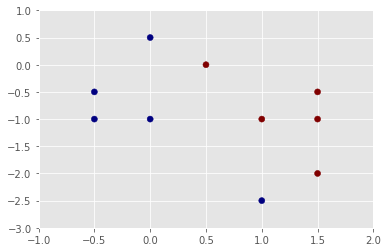

In [0]:
# Plot the data points
plt.figure(0)
plt.scatter(x=df.x1, y=df.x2, c=df.c, alpha=1, cmap="jet",label='_nolegend_')
plt.xlim([df.x1.min() -0.5, df.x1.max() +0.5])
plt.ylim([df.x2.min() -0.5, df.x2.max() +0.5])

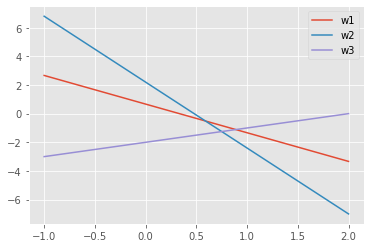

In [0]:
# Three models: w1 = [6,3,-2]; w2 = [4.6,1,-2.2]; w3= [1,-1,-2]
w1 = np.array([6,3,-2])
w2 = np.array([4.6,1,-2.2])
w3 = np.array([1,-1,-2])

# Ploting line w^Tx=0
x1 = np.linspace(-1,2,100)

# model w1
# 6x1 + 3x2 - 2 = 0
# x2 = 2/3 - 2x1
x2_1 = -2 * x1 + 2/3
plt.plot(x1 , x2_1, label = "w1")

# model w2
# 4.6x1 + x2 - 2.2 = 0
# x2 = 2.2 - 4.6x1
x2_2 = -4.6 * x1 + 2.2
plt.plot(x1 , x2_2, label = "w2")

# model w3
# x1 - x2 - 2 = 0
# x2 = x1 - 2
x2_3 = x1 - 2
plt.plot(x1 , x2_3, label = "w3")
plt.legend()

In [0]:
# Sigmoid Function
def sigmoid(z):
    return 1.0 / (1. + np.exp(-z))

# Logistic Function
def logistic(x1, x2, w):
    _feature = np.array([x1, x2, 1])
    z = np.inner(_feature, w)
    
    return sigmoid(z)

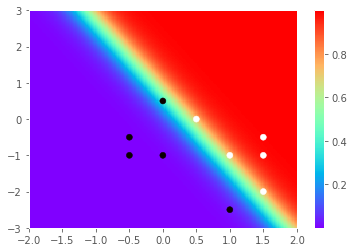

In [0]:
# Contour of z1 = logistic(6x1 + 3x2 - 2)
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-3, 3, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = logistic(X1, X2, w1)
plt.figure(3)
plt.pcolormesh(X1, X2, Z, cmap='rainbow') 
pp=plt.colorbar (orientation="vertical") 
plt.scatter(x=df.x1, 
            y=df.x2, 
            c=df.c, 
            alpha=1, cmap = "hot")
plt.show()

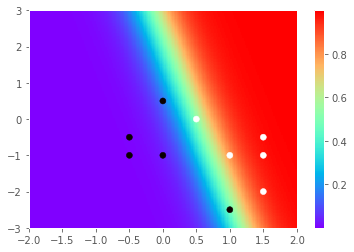

In [0]:
# Contour of z2 = logistic(4.6x1 + x2 - 2.2)
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-3, 3, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = logistic(X1, X2, w2)
plt.figure(2)
plt.pcolormesh(X1, X2, Z, cmap='rainbow') 
pp=plt.colorbar (orientation="vertical") 
plt.scatter(x=df.x1, 
            y=df.x2, 
            c=df.c, 
            alpha=1, cmap = "hot")
plt.show()

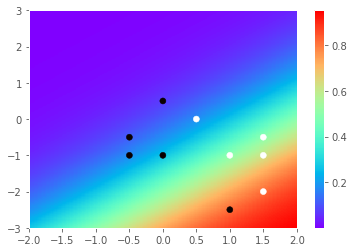

In [0]:
# Contour of z3 = logistic(x1 - x2 - 2)
x1 = np.linspace(-2, 2, 200)
x2 = np.linspace(-3, 3, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = logistic(X1, X2, w3)
plt.figure(1)
plt.pcolormesh(X1, X2, Z, cmap='rainbow') 
pp=plt.colorbar (orientation="vertical")
plt.scatter(x=df.x1,
            y=df.x2,
            c=df.c,
            alpha=1, cmap = "hot")
plt.show()